# MAp: Mutation Accumulation (in plasmids)

## Overview
In this Notebook we present our computational model designed to simulate plasmid behavior within bacterial populations. Our goal is to evaluate computationally how varying initial conditions, mutation rates, and other significant factors influence plasmid dynamics over time. By employing Object-Oriented Programming (OOP), we created a detailed representation of plasmids, bacterial cells, and bacterial populations to accurately model these biological entities and their interactions.

### Components of the Model
The model consists of three main components:

* **Plasmid Class:** This component represents individual plasmids, managing their properties and behaviors, including the occurrence of mutations. Each plasmid can accumulate mutations over time, which are tracked and logged for further analysis.

* **Bacteria Class:** This component models individual bacterial cells. Each cell contains multiple plasmids and is characterized by various parameters such as mutation rate. The bacterial cells replicate and mutate plasmids during their lifecycle.

* **Population Class:** This component simulates a collection of bacterial cells, modeling their growth, plasmid replication, and mutation processes over multiple generations. It provides a framework for studying the dynamics of plasmid evolution in a population context.

### Experimental Setup
To explore plasmid dynamics, we performed computational serial transfer experiments where a single bacterial clone was transferred between successive cultures over several days, allowing us to observe the accumulation and spread of mutations in plasmids over time.

### Simulations
We used our model to perform detailed simulations, accounting for different initial conditions and parameters. The simulations tracked the number and identity of plasmids within each bacterial cell across generations. Mutations could occur during plasmid replication, resulting in new plasmid mutants with distinct properties. The model allowed for varying mutation rates and maximum plasmid copy numbers, providing a comprehensive view of plasmid behavior under different conditions.

### Data Analysis and Visualization
To interpret the simulation results, we implemented several analysis functions to quantify various aspects of mutation dynamics, such as total mutations, fixed mutations, lost mutations, and new mutations over generations.
We also developed visualization tools to illustrate the mutation dynamics in plasmids, allowing us to study the evolutionary processes affecting plasmid populations, including the balance between mutation rates and plasmid copy numbers, and the impact of these factors on plasmid stability and diversity.

In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from collections import Counter
import time


### Plasmid Class

The `Plasmid` class represents individual plasmids within bacterial cells. Each plasmid has a unique identifier, tracks its mutation status, and logs any mutations that occur.

#### Initialization

A new plasmid object is initialized with a unique identifier (ID). If no ID is provided during initialization, a random HEX color code is generated and used as the ID. Initially, the plasmid is considered a wild type (indicated by the `isWT` attribute set to 1). The `log_mutations` attribute, which tracks mutations, starts as an empty string.

#### Methods

- **Description**: The `description` method provides a summary of the plasmid, including its ID, wild type status, and any logged mutations.
  
- **String Representation**: The `getString` method returns a string representation of the plasmid's mutation log. If no mutations have occurred, it returns an empty string.

- **Mutation**: The `mutate` method introduces a mutation to the plasmid. When a plasmid mutates, it is no longer considered a wild type (`isWT` is set to 0). A new random mutation ID, in the form of a HEX color code, is generated and appended to the `log_mutations` string.

#### Function in the Model

The `Plasmid` class models plasmid behavior within bacterial cells. By tracking mutations and maintaining a mutation log, the simulation can study the dynamics of plasmid replication, mutation, and segregation in bacterial populations. This class provides the framework to explore how varying mutation rates and plasmid copy numbers influence plasmid evolution.


In [2]:


class Plasmid:
    def __init__(self, id=None):
        """Initialize a new Plasmid object."""
        if id is None:
            id = ''.join(random.choice('ABCDEF0123456789') for _ in range(6))  # Random ID
        self.id = id
        self.log_mutations = ""  # Tracks mutations
        self.isWT = 1  # Indicates if it's the wild type (default is true)

    def description(self):
        """Print a description of the Plasmid."""
        print(f"\t{self.id} : isWT={self.isWT}")
        if self.log_mutations:
            print(f"\t\t\t{self.log_mutations}")

    def getString(self):
        """Return a string representation of the Plasmid, focused on mutations."""
        return self.log_mutations if self.log_mutations else ''

    def mutate(self):
        """Mutate the Plasmid."""
        self.isWT = 0  # It's no longer a wild type
        mutation_id = ''.join(random.choice('ABCDEF0123456789') for _ in range(6))  # Random mutation ID
        self.log_mutations = f"{self.log_mutations},{mutation_id}" if self.log_mutations else mutation_id


### Bacteria Class

The `Bacteria` class models a single bacterial cell and its associated plasmids. The bacteria can have a range of properties and behaviors, which are defined as follows:

#### Initialization

A new bacterial cell is initiated with a unique ID, various parameters like mutation rates, and a list of plasmids it carries.

#### Methods

- **Description**: The `description` method outputs a summary of the bacterial cell, including the number of plasmids it has and their types.
  
- **Plasmid Check**: The `is_segregant` method checks whether a bacterium has lost all its plasmids (possibly due to segregation during cell division). The `isWT` method checks if all its plasmids are wild type.

- **Mutation**: The `random_mutation` method applies a random mutation to a given plasmid based on a probability defined in the parameters.

- **Plasmid Replication**: The `replicate_plasmid` method replicates a specified plasmid, maintaining the historical mutations and possibly introducing a new mutation during the replication process.

- **Plasmid Simulation**: The `simulate_plasmids` method simulates what happens to the plasmids during one bacterial cell division event. This includes replication up to a maximum number of plasmids and the possibility of mutation.

The class encapsulates the complex biological processes of bacterial cell division, plasmid replication, and mutation. It allows for flexibility by taking in parameters that can be adjusted to explore different biological scenarios.


In [3]:

class Bacteria:
    def __init__(self, id, parameters, plasmids=None):
        """Initialize a new Bacteria object."""
        self.id = id
        self.parameters = parameters
        self.plasmids = plasmids if plasmids is not None else []

    def description(self):
        """Print a description of the bacteria and its plasmids."""
        print(f"***\n{self.id} : num_plasmids={len(self.plasmids)}")
        for p in self.plasmids:
            p.description()

    def getString(self):
        """Return a string representation of the bacteria and its plasmids."""
        ret = self.id
        for p in self.plasmids:
            ret += f";{p.getString()}"
        return f"{ret};"

    def is_segregant(self):
        """Check if the bacteria lost all plasmids."""
        return len(self.plasmids) == 0

    def random_mutation(self, this_plasmid):
        """Mutate the given plasmid based on a probability."""
        if random.random() < float(self.parameters["mut_rate"]):
            this_plasmid.mutate()

    def replicate_plasmid(self, iplasmid):
        """Replicate a plasmid by its index."""
        if iplasmid < len(self.plasmids):  # Check it exists
            plasmid_copy = Plasmid(self.plasmids[iplasmid].id)
            plasmid_copy.log_mutations = self.plasmids[iplasmid].log_mutations
            plasmid_copy.isWT = self.plasmids[iplasmid].isWT
            self.random_mutation(plasmid_copy)
            self.plasmids.append(plasmid_copy)

    def isWT(self):
        """Check if all plasmids are wild type."""
        return all(p.isWT for p in self.plasmids)

    def simulate_plasmids(self):
        """Simulate the replication and mutation of plasmids."""
        if self.parameters['max_plasmids'] == 1:
            self.random_mutation(self.plasmids[0])
        else:
            if self.plasmids:
                while len(self.plasmids) < self.parameters['max_plasmids']:
                    irand = random.randint(0, len(self.plasmids) - 1)
                    self.replicate_plasmid(irand)
                for plasmid in self.plasmids:
                    self.random_mutation(plasmid)
            else:
                print("* Plasmid lost through segregation")


### Population Class

The `Population` class is designed to simulate a collection of bacteria, each carrying its own set of plasmids.

#### Initialization

The population is initialized with an empty or pre-defined list of bacteria and sets a counter for plasmid segregation events to zero.

#### Methods

- **Description**: The `description` method gives a detailed look at each bacterium and the plasmids it carries by calling the `description` method of each `Bacteria` object.
  
- **Plasmid Checks**: The `is_segregant` method examines the whole population to see if any bacteria have lost all their plasmids. The `isWT` method checks if all bacteria in the population carry only wild type plasmids.

- **Population Growth**: The `grow` method is the core of the simulation. It iterates through each bacterium in the population to simulate its growth by calling its `simulate_plasmids` method. It also checks for and handles plasmid segregation events, keeping a count of such events. The method returns a string recording the history of mutations that occurred during the population growth.

- **Mutation History**: The `str_mut` variable captures the mutations that occurred during the population growth, which can be useful for further analysis.

This class provides a high-level interface for simulating complex bacterial populations to evaluate how different parameters affect plasmid population dynamics.


In [4]:

class Population:
    def __init__(self, bacteria=None):
        """Initialize the Population object."""
        self.bacteria = bacteria if bacteria is not None else []
        self.num_segregation_events = 0  # Count of plasmid segregation events

    def description(self):
        """Print a description of all bacteria in the population."""
        for b in self.bacteria:
            b.description()

    def is_segregant(self):
        """Check if any bacteria lost all plasmids."""
        return any(b.is_segregant() for b in self.bacteria)

    def grow(self):
        """Simulate the growth and mutations of the bacterial population."""
        str_mut = ''  # String to record mutations
        for b in self.bacteria:
            if b.plasmids:
                b.simulate_plasmids()
                str_mut += b.getString()

                to_remove = [p for p in b.plasmids if random.random() > 0.5]

                if len(to_remove) < b.parameters['max_plasmids']:
                    b.plasmids = [p for p in b.plasmids if p not in to_remove]
                else:
                    b.plasmids = to_remove
                    self.num_segregation_events += 1

                if not b.plasmids:
                    print("** Plasmid lost through segregation")
            else:
                print("*** Plasmid lost through segregation")

        str_mut += '\n'
        return str_mut

    def isWT(self):
        """Check if all bacteria are wild type."""
        return all(b.isWT() for b in self.bacteria)


### Serial Transfer Experiment

In our serial transfer experiment, we simulate the transfer of bacterial cells over several days to study the dynamics of plasmid evolution within a bacterial population. The key feature of this experiment is that only a single bacterial clone is transferred between transfers. This approach ensures that we are observing the evolution and behavior of plasmids within a controlled, clonal population.

#### Experimental Setup

We begin with a single bacterial cell (clone) initialized with a set of plasmids. The parameters for the experiment include the number of days to simulate, the number of generations per day, the maximum number of plasmids each bacterium can carry, and the mutation rate.

#### Simulation Process

1. **Initialization**:
   - A single bacterial cell (clone) is created with a unique ID and a set of parameters including mutation rate and maximum plasmid count.
   - A list of plasmid objects is generated and assigned to this bacterial cell.

2. **Daily Growth**:
   - For each day of the simulation, the bacterial population is allowed to grow for a specified number of generations.
   - During each generation, the `grow` method of the `Population` class simulates plasmid replication, mutation, and segregation events.
   - The simulation tracks the history of mutations and plasmid dynamics within the population.

3. **Serial Transfer**:
   - At the end of each day, only a single bacterial clone is transferred to the next day’s population. This clone is selected from the current population and used to initialize the population for the next day.
   - This transfer process is repeated for the specified number of days.

4. **Termination**:
   - The simulation terminates if the bacterial cell loses all plasmids (segregant) during any generation, in which case the experiment records zero plasmids and exits.
   - At the end of the simulation period, the experiment checks for the presence of mutations in the plasmids.

#### Results

The simulation returns two outputs:
- A binary indicator of whether any mutations were observed in the plasmids (1 if mutations were present, 0 otherwise).
- A list of simulation results detailing the mutations and plasmid dynamics observed during the experiment.




In [5]:

# Assuming the necessary classes Plasmid, Bacteria, and Population are defined elsewhere

def simulateTransfer(num_days, num_generations, max_plasmids, mut_rate):
    """
    Simulate the transfer of bacterial cells over several days.

    Parameters:
        num_days: Number of days to simulate.
        num_generations: Number of generations per day.
        max_plasmids: Maximum number of plasmids in each bacteria.
        mut_rate: Mutation rate.
    """
    this_id = 'B0'
    this_parameters = {
        "mut_rate": mut_rate,
        "max_plasmids": max_plasmids,
    }

    # Create a list of Plasmid objects
    plasmids = [Plasmid() for _ in range(max_plasmids)]

    # Initialize Bacteria object
    B0 = Bacteria(this_id, this_parameters)
    B0.plasmids = plasmids

    # Simulate plasmid behavior
    B0.simulate_plasmids()

    # Create Population object
    pop = Population([B0])

    # Initialize a list to store the simulation results
    simulation_results = []

    for day in range(num_days):
        for ti in range(num_generations):
            str_mut = pop.grow()

            if pop.is_segregant():  # No plasmids found
                return 0, simulation_results

            # Append simulation data to the results list
            simulation_results.append(f"{day};{ti};{str_mut.strip()}")

        # Reset population for the next day
        Bi = pop.bacteria[0]
        pop = Population([Bi])

    # Check for mutations
    if pop.isWT():
        return 0, simulation_results

    return 1, simulation_results

#### Analysis Functions

We have implemented several functions to analyze the mutation dynamics during the simulation. These functions take in mutation data and return numpy arrays that summarize different aspects of mutation counts per generation.




In [6]:
#getCountMuts() takes a list of mutation counts per generation.
#Returns a numpy array with the mutation counts for each generation.
def getCountMuts(muts):
  count_muts=[len(l) for l in muts]
  return np.array(count_muts)

#getCountFixedMuts() takes a list of fixed mutations per generation.
#Returns a numpy array with the counts of fixed mutations for each generation.
def getCountFixedMuts(fixed_muts):
  count_muts=[len(l) for l in fixed_muts]
  return np.array(count_muts)

#getCountLostMuts() takes a list of mutation counts per generation.
#Returns a numpy array with the counts of lost mutations for each generation.
def getCountLostMuts(muts):
  count_muts=[len(l) for l in muts]
  count_lost_muts=np.diff(count_muts)
  count_lost_muts[count_lost_muts>0]=0
  return np.abs(np.array(count_lost_muts))

#getCountNewMuts() takes a list of mutation counts per generation.
#Returns a numpy array with the counts of new mutations for each generation.
def getCountNewMuts(muts):
  count_muts=[len(l) for l in muts]
  count_new_muts=np.diff(count_muts)
  count_new_muts[count_new_muts<0]=0
  return np.array(count_new_muts)

#getMutGenerations() takes the plasmid data and a list of generations.
#Returns a list of lists with the mutations present in each generation and a list of lists with the mutations fixed in each generation.
#This method extracts the mutations for each generation from the plasmid data and then identifies which mutations have become fixed.
def getMutGenerations(data_plasmids, gens):

    data_gens = column(data_plasmids, 1)
    data_IDs = column(data_plasmids, 2)
    num_plasmids = len(data_plasmids[0]) - 4

    muts = []
    fixed_muts = []
    for igen in gens:  # For generations
        # Find all current mutations
        current_muts = []
        for ip in range(3, num_plasmids + 3):  # For plasmids
            this_column = column(data_plasmids, ip)

            if igen < len(this_column):  # Ensure indexing is within bounds
                col = this_column[igen]
            else:
                col = ''  # Handle out-of-bounds by assigning an empty string

            mut_color = col.split(',')

            for this_color in mut_color:  # For mutations
                current_muts.append(this_color)  # Append all mutations

        current_muts = [i for i in current_muts if i]  # Remove empty

        mut_keys = list(Counter(current_muts).keys())
        mut_freqs = list(Counter(current_muts).values())  # Counts the mutations frequency

        ifixed_muts = [i for i, m in enumerate(mut_freqs) if m == num_plasmids]
        current_fixed_muts = [mut_keys[imut] for imut in ifixed_muts]

        muts.append(mut_keys)
        fixed_muts.append(current_fixed_muts)

    return muts, fixed_muts

### Experimental Evolution

The `runExperiment` function simulates the dynamics of plasmid mutations in a bacterial population over a specified number of days and generations. It uses a combination of simulation and analysis functions to produce detailed results on mutation counts and dynamics.

#### Parameters

- `num_days`: Number of days to simulate.
- `num_generations`: Number of generations per day.
- `this_max_plasmids`: Maximum number of plasmids in each bacterium.
- `mut_rate`: Mutation rate.
- `verbose`: If set to `True`, additional debugging information is printed.

#### Process

1. **Initialization**:
   - The function starts a timer and initializes empty lists for experiment results and detailed data.

2. **Simulation**:
   - The `simulateTransfer` function is called to simulate the transfer of bacterial cells over the specified number of days and generations. It returns a success indicator and the simulation results.
   - If the simulation is successful (i.e., mutations occur), the results are processed further.

3. **Processing Simulation Results**:
   - For each entry in the simulation results, the day, generation time, and mutation data are extracted.
   - The mutation data string is processed using the `importDataFromString` function to convert it into a data structure compatible with the analysis functions.

4. **Mutation Analysis**:
   - The `getMutGenerations` function is used to extract mutations and fixed mutations for each generation.
   - Various mutation statistics are calculated using helper functions:
     - `getCountMuts`: Counts mutations per generation.
     - `getCountFixedMuts`: Counts fixed mutations per generation.
     - `getCountNewMuts`: Counts new mutations per generation.
     - `getCountLostMuts`: Counts lost mutations per generation.
     - Cumulative counts of new and lost mutations are also calculated.

5. **Storing Results**:
   - The calculated mutation statistics are stored in a dictionary and appended to the experiment results list.
   - Detailed data for each day is also stored for further analysis.

6. **Completion**:
   - If `verbose` is set to `True`, the function prints the total simulation time.
   - The function returns the experiment results and detailed data.

In [7]:


def runExperiment(num_days, num_generations, this_max_plasmids, mut_rate, verbose=False):
    # Start timer
    start_time = time.time()

    # Initialize variables
    experiment_results = []
    detailed_data = []

    # Run a single experiment
    # Simulate transfer
    success, simulation_results = simulateTransfer(num_days, num_generations, this_max_plasmids, mut_rate)
    if success > 0:

        # Process simulation results directly
        for entry in simulation_results:
            day, ti, str_mut = entry.split(';', 2)
            if verbose:
              print(f"Day {day}, Time {ti}, Mutations {str_mut}")  # Debugging line
            # Assuming importData is adapted to work in-memory and returns the necessary structure
            data_plasmids = importDataFromString(str_mut, this_max_plasmids, verbose)  # Pass max plasmids

            detailed_data.append(data_plasmids)

            # Extract mutation data
            all_gens = range(0, num_generations * num_days)
            rep_muts, rep_fixed_muts = getMutGenerations(data_plasmids, all_gens)

            # Calculate mutation statistics
            rep_results = {}
            rep_results['rep_count_muts'] = getCountMuts(rep_muts)
            rep_results['rep_count_fixed_muts'] = getCountFixedMuts(rep_fixed_muts)
            rep_results['rep_count_ht_muts'] = rep_results['rep_count_muts'] - rep_results['rep_count_fixed_muts']
            rep_results['rep_count_new_muts'] = getCountNewMuts(rep_muts)
            rep_results['rep_cum_new_muts'] = np.cumsum(rep_results['rep_count_new_muts'])
            rep_results['rep_count_lost_muts'] = getCountLostMuts(rep_muts)
            rep_results['rep_cum_lost_muts'] = np.cumsum(rep_results['rep_count_lost_muts'])

            rep_results['nexpe'] = 1

            experiment_results.append(rep_results)

    if verbose:
        print('Simulation completed in %s seconds' % (time.time() - start_time))

    return experiment_results, detailed_data


def importDataFromString(str_mut, num_plasmids, verbose=False):
    """
    Process mutation data from a string representation.

    Parameters:
        str_mut: String containing mutation data.
        num_plasmids: Number of plasmids per bacteria.

    Returns:
        Data structure compatible with getMutGenerations and other functions.
    """
    if verbose:
      print("Processing str_mut:", str_mut)  # Debugging line
    data_plasmids = []
    # Split the input string into lines
    lines = str_mut.strip().split('\n')

    # Process each line to convert into the expected format
    for this_line in lines:
        if verbose:
          print("Processing line:", this_line)  # Debugging line
        this_row = this_line.strip()
        this_plasmids = this_row.split(';')
        this_plasmids[3:] = sorted(this_plasmids[3:], reverse=True)

        # Ensure each plasmid slot has a default color if empty
        while len(this_plasmids) < num_plasmids + 3:
            this_plasmids.append('FFFFFF')

        data_plasmids.append(this_plasmids)

    if verbose:
      print("Processed data_plasmids:", data_plasmids)  # Debugging line
    return data_plasmids

def column(matrix, i):
    """
    Extracts a column from a matrix.

    Parameters:
        matrix: List of lists.
        i: Column index to extract.
    """
    return [row[i] for row in matrix]



In [8]:

# Example usage:
num_generations = 24
this_max_plasmids = 10
mut_rate = 0.01
num_days = 7
result, detailed_data = runExperiment(num_days, num_generations, this_max_plasmids, mut_rate, verbose=False)

# Define the gens (range of generations)
gens = range(num_generations * num_days)

# Flatten the detailed data for plotting
flattened_data_plasmids = [item for sublist in detailed_data for item in sublist]

### Mutation Visualization

The image produced by the `plotMutGenerations` function visualizes the mutation dynamics in plasmids across multiple generations. Each row represents a single plasmid, while each column represents a generation. The colors within each cell indicate different mutations.

#### Description of the Visualization

- **X-Axis (Generations)**: The horizontal axis represents the number of generations. Major ticks are labeled at intervals corresponding to the number of generations per day.
- **Y-Axis (Plasmids)**: The vertical axis represents individual plasmids, numbered from 1 to the maximum number of plasmids.
- **Cells and Colors**:
  - Each cell corresponds to a specific plasmid at a specific generation.
  - The colors within each cell represent different mutations. Each unique color code corresponds to a unique mutation.
  - Cells filled with a default color (e.g., grey) indicate the absence of mutations.

  - Light grey lines separate each generation.
  - White lines are drawn at intervals to mark days, providing a clear distinction between daily cycles.

This visual representation allows for a detailed observation of how mutations accumulate and spread across plasmids over multiple generations.

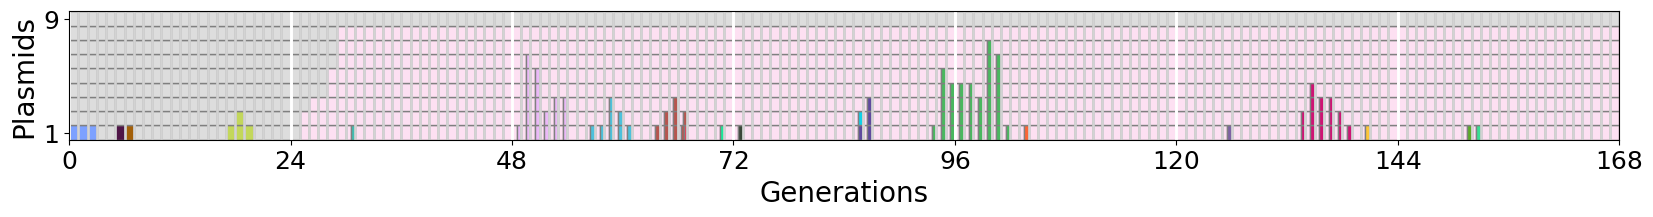

In [9]:
def plotMutGenerations(data_plasmids, gens, num_plasmids, num_generations):
    """
    Plots the mutation dynamics in plasmids over multiple generations.

    Parameters:
        data_plasmids: List of plasmid data.
        gens: List of generation indices.
        num_plasmids: Number of plasmids.
    """

    # Configure plot appearance
    plt.rcParams.update({'font.size': 18})
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['savefig.facecolor'] = 'white'
    fig, ax = plt.subplots(figsize=(20, num_plasmids / 6))

    # Iterate through each plasmid
    for ip in range(3, num_plasmids + 2):

        # Extract the column corresponding to the current plasmid
        this_column = [row[ip] for row in data_plasmids]

        for igen in gens:
            if len(this_column) == 0:
                mut_color = ['FFFFFF']  # Default color for no mutations
            else:
                col = this_column[igen]
                if col is None:
                    mut_color = ['FFFFFF']  # Default color for no mutations
                else:
                    mut_color = col.split(',')

            num_muts_in_plasmid = len(mut_color)
            for imut, this_color in enumerate(mut_color):

                if not this_color:
                    this_color = 'DDDDDD'  # Default color for empty mutation

                # Add a rectangle patch representing the mutation
                ax.add_patch(Rectangle((igen + imut / num_muts_in_plasmid, ip - 2.5), 1 / num_muts_in_plasmid, 1,
                                       edgecolor='grey',
                                       facecolor='#%s' % this_color,
                                       fill=True,
                                       lw=1))

                plt.vlines(x=igen, ymin=0, ymax=num_plasmids + .5, colors='lightgrey', lw=1)

            # Add vertical lines to mark major generation intervals
            if igen % num_generations == 0:
                plt.vlines(x=igen, ymin=0, ymax=num_plasmids + .5, colors='white', lw=2)

    # Set plot limits and labels
    ax.set_xlim([gens[0], gens[-1]])
    ax.set_ylim([0.5, num_plasmids - .5])
    ax.set_xlabel('Generations', fontsize=20)
    ax.set_ylabel('Plasmids', fontsize=20)
    ax.set_yticks([1, num_plasmids - 1])
    ax.set_xticks(range(gens[0], gens[-1] + 3, num_generations))

    plt.show()


def column(matrix, i):
    """
    Extracts a column from a matrix.

    Parameters:
        matrix: List of lists.
        i: Column index to extract.
    """
    return [row[i] for row in matrix]


# Plot the detailed mutation data
plotMutGenerations(flattened_data_plasmids, gens, this_max_plasmids, num_generations)

### Visualizing Mutation Dynamics Over Transfers

The image produced by the `plotMutDays` function illustrates the mutation dynamics in plasmids over multiple transfers. The horizontal axis represents the number of transfers, and the vertical axis represents individual plasmids.

- **Transfers**: The horizontal axis is labeled to indicate the number of transfers.
- **Plasmids**: The vertical axis displays the plasmids.
- **Cells and Colors**:
  - Colors within each cell represent different mutations, with each unique color corresponding to a specific mutation.
  - Default colors indicate the absence of mutations.
- **Vertical Lines**:
  - White lines mark the boundaries between transfers, providing a clear distinction between transfer cycles.



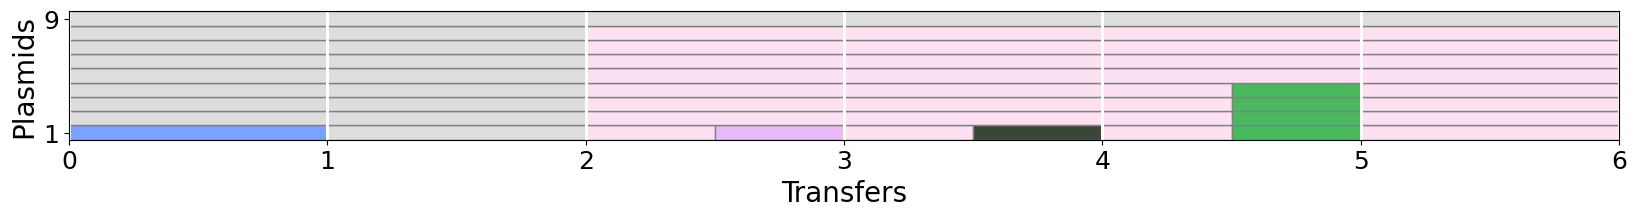

In [10]:

def plotMutDays(data_plasmids, days, num_generations):
    """
    Plots the mutation dynamics in plasmids over multiple transfers.

    Parameters:
        data_plasmids: List of plasmid data.
        days: List of days to be plotted.
    """

    # Extract generation and plasmid ID data
    data_gens = column(data_plasmids, 1)
    data_IDs = column(data_plasmids, 2)
    num_plasmids = len(data_plasmids[0]) - 3

    # Configure plot appearance
    plt.rcParams.update({'font.size': 18})
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['savefig.facecolor'] = 'white'
    fig, ax = plt.subplots(figsize=(20, num_plasmids/6))

    # Iterate through each plasmid
    for ip in range(3, num_plasmids + 2):

        # Extract the column corresponding to the current plasmid
        this_column = column(data_plasmids, ip)

        # Calculate generation indices for the specified days
        gens = num_generations * np.array(days)
        for igen in gens:
            col = this_column[igen]
            if col is None:
                mut_color = ['000000']  # Default color for no mutations
            else:
                mut_color = col.split(',')

            num_muts_in_plasmid = len(mut_color)
            try:
                for imut, this_color in enumerate(mut_color):
                    if not this_color:
                        this_color = 'DDDDDD'  # Default color for empty mutation

                    # Calculate the current day
                    this_day = igen / num_generations
                    # Add a rectangle patch representing the mutation
                    ax.add_patch(Rectangle((this_day + imut / num_muts_in_plasmid, ip - 2.5),
                                           1 / num_muts_in_plasmid, 1,
                                           edgecolor = 'grey',
                                           facecolor = '#%s' % this_color,
                                           fill=True,
                                           lw=1))
            except:
                print('ERROR: *%s*' % this_color)  # Error handling for color assignment

            # Add vertical lines to separate transfers
            if igen % num_generations == 0:
                plt.vlines(x=this_day, ymin=0, ymax=num_plasmids + .5, colors='white', lw=2)

    # Set plot limits and labels
    ax.set_xlim([days[0], days[-1]])
    ax.set_ylim([0.5, num_plasmids - .5])
    ax.set_xlabel('Transfers', fontsize=20)
    ax.set_ylabel('Plasmids', fontsize=20)
    ax.set_yticks([1, num_plasmids - 1])
    plt.show()


# Define the days to plot
days_to_plot = list(range(num_days))

# Plot the mutation dynamics over the specified days
plotMutDays(flattened_data_plasmids, days_to_plot, num_generations)



### Mutation Count Over Generations

The figure produced by the `plotCountMutGenerations` function shows the dynamics of various types of mutations in plasmids over multiple generations.

#### Description of the Visualization

- **Generations**: The horizontal axis represents the number of generations.
- **Number of Mutations**: The vertical axis shows the number of mutations.

#### Mutation Types

- **Lost Mutations (Red Dotted Line)**: Cumulative count of mutations that have been lost over generations.
- **Fixed Mutations (Blue Dotted Line)**: Count of mutations that have become fixed (present in all plasmids) over generations.
- **Total Mutations (Black Dotted Line)**: Cumulative count of all mutations that have occurred.
- **HT Mutations (Blue Solid Line)**: Count of heteroplasmic mutations (present in some but not all plasmids).
- **Current Mutations (Black Solid Line)**: Current count of mutations present in the population.

This visualization illustrates the overall mutation dynamics, including how many mutations are lost, fixed, or persist as heteroplasmic over time in an evolutionary experiment.


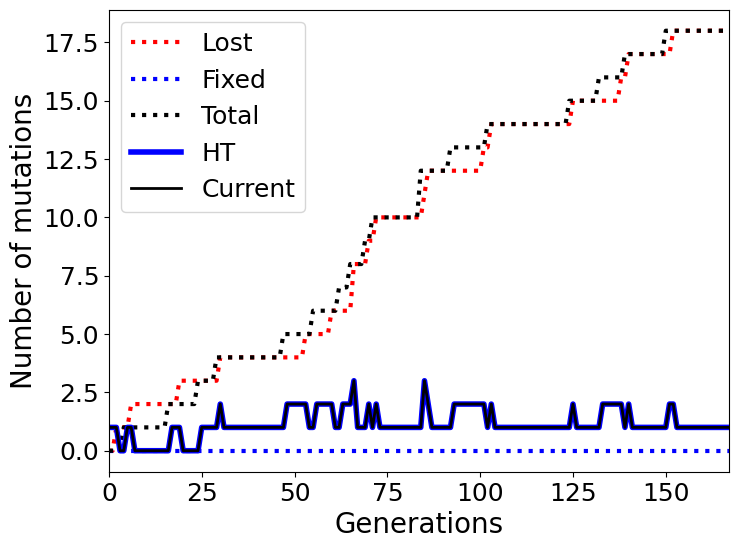

In [11]:

def plotCountMutGenerations(this_gens, muts, fixed_muts):
    """
    Plots the count of various mutation types over generations.

    Parameters:
        this_gens: List of generation indices.
        muts: List of mutation data.
        fixed_muts: List of fixed mutation data.
        plotSIM: Optional; file path to save the plot.
    """

    # Calculate various mutation statistics
    count_muts = getCountMuts(muts)
    count_fixed_muts = getCountFixedMuts(fixed_muts)
    count_ht_muts = count_muts - count_fixed_muts
    count_new_muts = getCountNewMuts(muts)
    cum_new_muts = np.cumsum(count_new_muts)
    count_lost_muts = getCountLostMuts(muts)
    cum_lost_muts = np.cumsum(count_lost_muts)

    # Ensure all arrays have the same length
    this_gens = np.array(this_gens)
    this_gens_trimmed = this_gens[:len(cum_lost_muts)]

    # Configure plot appearance
    plt.rcParams.update({'font.size': 18})
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['savefig.facecolor'] = 'white'
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot cumulative lost mutations, fixed mutations, cumulative new mutations, HT mutations, and current mutations
    ax.plot(this_gens_trimmed, cum_lost_muts, 'r:', label='Lost', lw=3)
    ax.plot(this_gens, count_fixed_muts, 'b:', label='Fixed', lw=3)
    ax.plot(this_gens_trimmed, cum_new_muts, 'k:', label='Total', lw=3)
    ax.plot(this_gens, count_ht_muts, 'b-', label='HT', lw=4)
    ax.plot(this_gens, count_muts, 'k-', label='Current', lw=2)

    # Set plot limits and labels
    ax.set_xlim([this_gens[0], this_gens[-1]])
    ax.set_xlabel('Generations', fontsize=20)
    ax.set_ylabel('Number of mutations', fontsize=20)
    ax.legend()

    plt.show()


# Extract mutation data for generations
all_gens = range(0, num_generations * num_days)
muts, fixed_muts = getMutGenerations(flattened_data_plasmids, all_gens)

# Plot the mutation statistics over generations
plotCountMutGenerations(gens, muts, fixed_muts)
